# PreProcessing points coordinate

## Using Exp point for validation

In [21]:
import pandas as pd
section = 0.2
L_dic = {'0.2':0.63495, '0.65':0.50379, '0.8':0.44343, '0.9':0.41128}
exp_path = f"exp/exp{int(section * 100)}pc.csv"
exp_df = pd.read_csv(exp_path, delimiter='\s+', header=None, names=['Section','Tap','X/L','Z/L','Cp']).round(5)
L = L_dic[f'{section}']
y = round(section * 1.1963, 5)
exp_df['x'] = exp_df['X/L'] * L
exp_df['z'] = exp_df['Z/L'] * L
exp_df['y'] = y
formatted_data = exp_df.apply(lambda row: f"({row['x']} {row['y']} {row['z']})", axis=1)
write_path_EXP = 'system/include/EXP'
with open(write_path_EXP, 'w') as file:
    file.write("pts\n(\n")
    for line in formatted_data:
        file.write(f"{line}\n")
    file.write(");")
print(f'Write the surface points in {write_path_EXP} file.')

Write the surface points in system/include/EXP file.


## Using xz coordinate point

In [2]:
import numpy as np
x_min, x_max = -0.05, 1.25
z_min, z_max = -0.075, 0.075
y = 0
res = 64

x_values = np.linspace(x_min, x_max, res)
z_values = np.linspace(z_min, z_max, res)

write_path_AIP = 'system/include/AIP'
with open(write_path_AIP, 'w') as file:
    file.write("pts\n(\n")
    for z in z_values:
        y *= 1.1963
        for x in x_values:
            file.write(f"({x} {y} {z})\n")
    file.write(");")
print(f'Write the surface points in {write_path_AIP} file.')

Write the surface points in system/include/AIP file.


## Using XZ coordinate point for internalCloud

In [8]:
import numpy as np
x_min, x_max = -0.5,1.5
z_min, z_max = -1,1
y_values = [0.2, 0.65, 0.8, 0.9, 0.96]
res = 512

x_values = np.linspace(x_min, x_max, res)
z_values = np.linspace(z_min, z_max, res)

write_path_AIP = 'system/include/AIP'
with open(write_path_AIP, 'w') as file:
    file.write("pts\n(\n")
    for z in z_values:
        for y in y_values:
            y *= 1.1963
            for x in x_values:
                file.write(f"({x} {y} {z})\n")
    file.write(");")
print(f'Write the surface points in {write_path_AIP} file.')

Write the surface points in system/include/AIP file.


# PostProcessing

## Global

Text(0, 0.5, 'Y pixel')

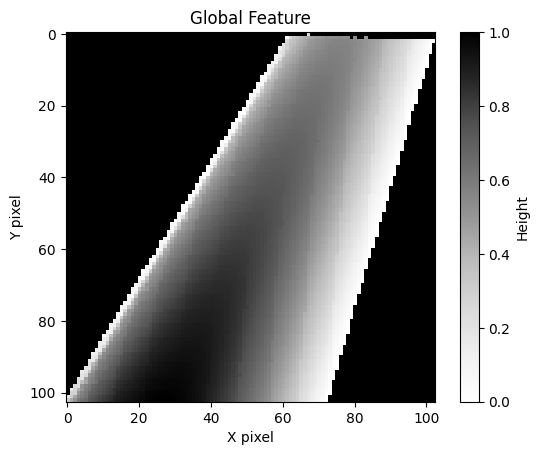

In [23]:
import numpy as np
import pandas as pd
file_path = 'postProcessing/boundaryCloud/1200/surface_p_res128.xy'
postProcessing_content = pd.read_csv(file_path, delimiter='\s+', skiprows=0, header=None, names=['x','y','z','p'])
upper = postProcessing_content[(postProcessing_content['z'] >= 0.)]
x = upper['x']
y = upper['y']
z = upper['z']
normalized_x = (x - x.min()) / (x.max() - x.min())
normalized_y = y / y.max()
normalized_z = (z - z.min()) / (z.max() - z.min())
res = round(len(x) ** (1/3))
npOutput = np.ones((res,res))
npOutput[(normalized_x * (res-1)).astype(int), (normalized_y * (res-1)).astype(int)] = normalized_z
field = np.copy(npOutput)
field = np.flipud(field.transpose())

import matplotlib.pyplot as plt
plt.imshow(field, cmap='Greys', interpolation='nearest')
plt.colorbar(label='Height')
plt.title('Global Feature')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')

## Surface pressure coeff

/tmp/ipykernel_6636/1596505296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upper['Cp'] = (upper['p']-98858.97) / pv


Text(0, 0.5, 'Y pixel')

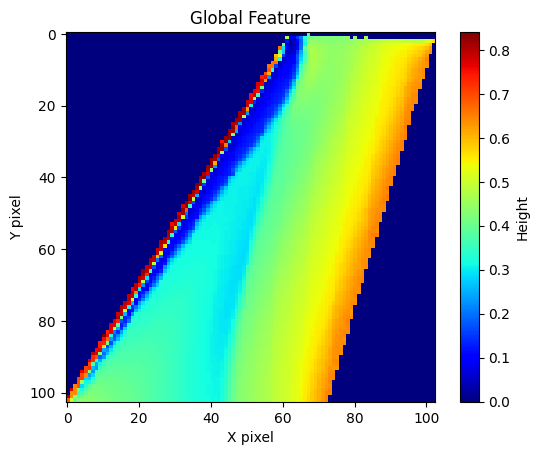

In [42]:
file_path = 'postProcessing/boundaryCloud/1200/surface_p_res128.xy'
postProcessing_content = pd.read_csv(file_path, delimiter='\s+', skiprows=0, header=None, names=['x','y','z','p'])
upper = postProcessing_content[(postProcessing_content['z'] >= 0.)]

rho = 1.184
v = 292.67
pv = 0.5 * rho * (v**2)
upper['Cp'] = (upper['p']-98858.97) / pv
def normalize(boundary_content):
    L = boundary_content['x'].max() - boundary_content['x'].min()
    lead = boundary_content['x'].min()
    boundary_content['X/L'] = (boundary_content['x'] - lead) / L
    return boundary_content
x = upper['x']
y = upper['y']
cp = upper['Cp']

normalized_x = (x - x.min()) / (x.max() - x.min())
normalized_y = y / y.max()
normalized_Cp = (cp - cp.min()) / (cp.max() - cp.min())
res = round(len(x) ** (1/3))
npOutput = np.zeros((res,res))
npOutput[(normalized_x * (res-1)).astype(int), (normalized_y * (res-1)).astype(int)] = normalized_Cp
field = np.copy(npOutput)
field = np.flipud(field.transpose())

import matplotlib.pyplot as plt
plt.imshow(field, cmap='jet', interpolation='nearest')
plt.colorbar(label='Height')
plt.title('Global Feature')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')

## Local Feature

Text(0, 0.5, 'Y pixel')

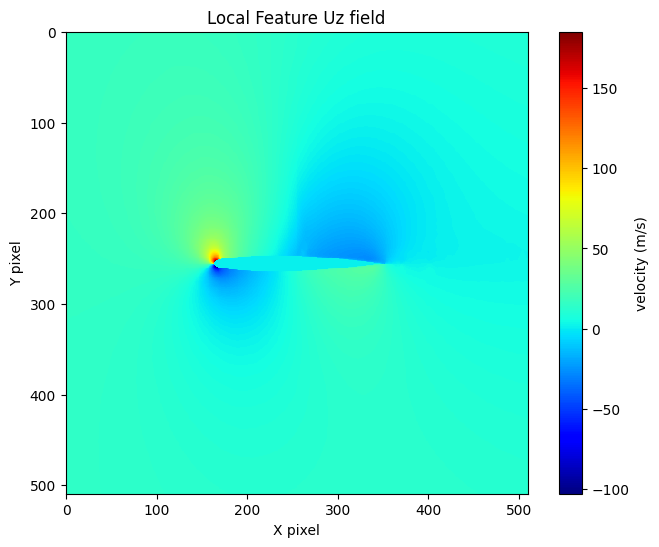

In [3]:
import pandas as pd
import numpy as np
file_path = 'postProcessing/internalProbes/1200/points.xy'
postProcessing_content = pd.read_csv(file_path, delimiter='\s+', skiprows=1, header=None, names=['x','y','z','p','u','v','w'])
section = 0.2
section_df = postProcessing_content[(postProcessing_content['y'] >= section * 1.1963 - 1e-2) & (postProcessing_content['y'] <= section * 1.1963 + 1e-2)]
x = section_df['x']
z = section_df['z']
p = section_df['p']
u = section_df['u']
v = section_df['v']
w = section_df['w']
normalized_x = (x - x.min()) / (x.max() - x.min())
normalized_z = (z - z.min()) / (z.max() - z.min())
res = round(len(x) ** (1/2))
# print(res)
npOutput = np.ones((4,res,res))
npOutput[0][(normalized_x * (res-1)).astype(int), (normalized_z * (res-1)).astype(int)] = p
npOutput[1][(normalized_x * (res-1)).astype(int), (normalized_z * (res-1)).astype(int)] = u
npOutput[2][(normalized_x * (res-1)).astype(int), (normalized_z * (res-1)).astype(int)] = v
npOutput[3][(normalized_x * (res-1)).astype(int), (normalized_z * (res-1)).astype(int)] = w
field = np.copy(npOutput[3])
field = np.flipud(field.transpose())

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.imshow(field, cmap='jet', interpolation='nearest')
plt.colorbar(label='velocity (m/s)')
plt.title('Local Feature Uz field')
plt.xlabel('X pixel')
plt.ylabel('Y pixel')

# Validation

## OpenFOAM vs Exp

/tmp/ipykernel_6636/276179818.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_content['X/L'] = (boundary_content['x'] - lead) / L


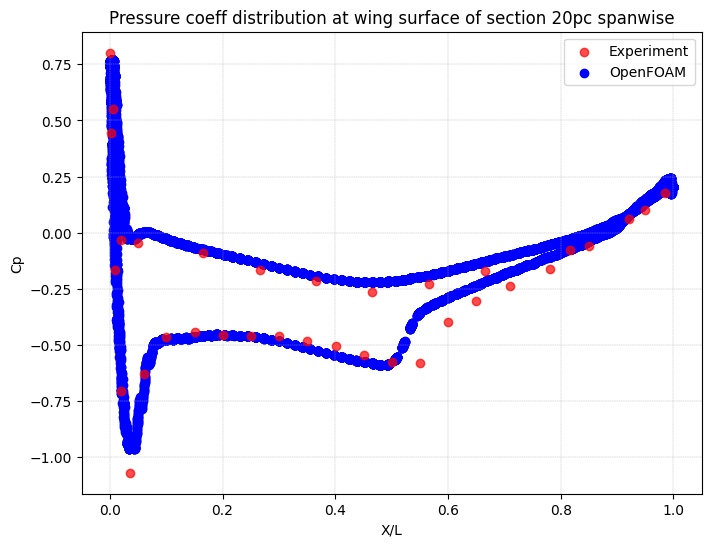

In [31]:
# Section
import pandas as pd
import numpy as np
file_path = 'postProcessing/boundaryCloud/1200/surface_p_res128.xy'
boundary_content = pd.read_csv(file_path, delimiter='\s+', skiprows=1, header=None, names=['x','y','z','p']).round(5)
# file_path = 'postProcessing/internalCloud/1200/AIP_p_U.xy'
# boundary_content = pd.read_csv(file_path, delimiter='\s+', skiprows=1, header=None, names=['x','y','z','p','u','v','w']).round(5)

rho = 1.184
v = 292.67
pv = 0.5 * rho * (v**2)
boundary_content['Cp'] = (boundary_content['p']-98858.97) / pv
def normalize(boundary_content):
    L = boundary_content['x'].max() - boundary_content['x'].min()
    lead = boundary_content['x'].min()
    boundary_content['X/L'] = (boundary_content['x'] - lead) / L
    return boundary_content

section = 0.2
y_coord = np.round(1.1963 * section,5)
of_df = boundary_content[(boundary_content['y'] <= y_coord + 4e-3) & (boundary_content['y'] >= y_coord - 4e-3)]
of_df = normalize(of_df)
exp_path = f"exp/exp{int(section * 100)}pc.csv"
exp_df = pd.read_csv(exp_path, delimiter='\s+', header=None, names=['Section','Tap','X/L','Z/L','Cp']).round(5)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(exp_df['X/L'], exp_df['Cp'], color='red',alpha=0.7, label='Experiment', zorder=2)
plt.scatter(of_df['X/L'], of_df['Cp'], color='blue', label='OpenFOAM')
# plt.scatter(of_upper['X/L'], of_upper['Cp'], color='blue', marker='^', label='OpenFOAM upper')
# plt.scatter(of_lower['X/L'], of_lower['Cp'], color='blue', marker='v', label='OpenFOAM lower')

plt.xlabel('X/L')
plt.ylabel('Cp')
plt.title(f'Pressure coeff distribution at wing surface of section {int(section * 100)}pc spanwise')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.legend()
plt.savefig(f"plots/section{int(section*100)}pc")

## OpenFOAM vs Fluent

/tmp/ipykernel_6636/3230754685.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_content['X/L'] = (boundary_content['x'] - lead) / L


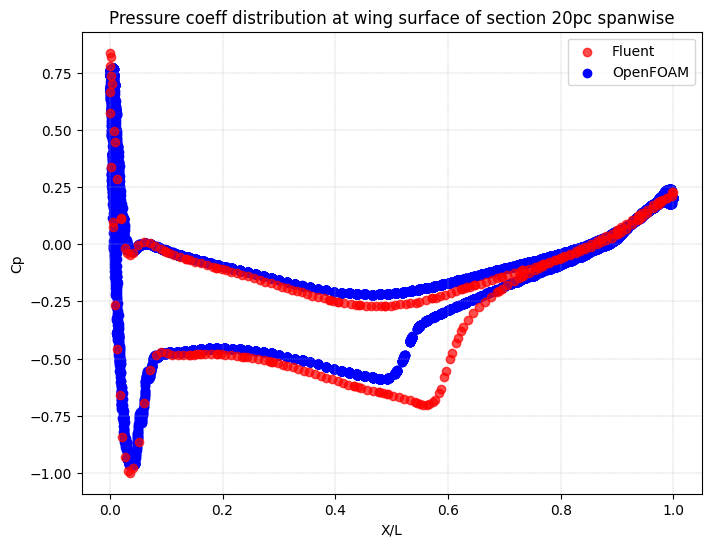

In [38]:
# Section
import pandas as pd
import numpy as np
file_path = 'postProcessing/boundaryCloud/1200/surface_p_res128.xy'
boundary_content = pd.read_csv(file_path, delimiter='\s+', skiprows=1, header=None, names=['x','y','z','p']).round(5)
# file_path = 'postProcessing/internalCloud/1200/AIP_p_U.xy'
# boundary_content = pd.read_csv(file_path, delimiter='\s+', skiprows=1, header=None, names=['x','y','z','p','u','v','w']).round(5)

rho = 1.184
v = 292.67
pv = 0.5 * rho * (v**2)
boundary_content['Cp'] = (boundary_content['p']-98858.97) / pv
def normalize(boundary_content):
    L = boundary_content['x'].max() - boundary_content['x'].min()
    lead = boundary_content['x'].min()
    boundary_content['X/L'] = (boundary_content['x'] - lead) / L
    return boundary_content

section = 0.2
y_coord = np.round(1.1963 * section,5)
of_df = boundary_content[(boundary_content['y'] <= y_coord + 4e-3) & (boundary_content['y'] >= y_coord - 4e-3)]
of_df = normalize(of_df)
fluent_path = f"20pc_fluent.csv"
fluent_df = pd.read_csv(fluent_path, delimiter=',', header=None, names=['x','Cp']).round(5)
fluent_df = normalize(fluent_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(fluent_df['X/L'], fluent_df['Cp'], color='red',alpha=0.7, label='Fluent', zorder=2)
plt.scatter(of_df['X/L'], of_df['Cp'], color='blue', label='OpenFOAM')
# plt.scatter(of_upper['X/L'], of_upper['Cp'], color='blue', marker='^', label='OpenFOAM upper')
# plt.scatter(of_lower['X/L'], of_lower['Cp'], color='blue', marker='v', label='OpenFOAM lower')

plt.xlabel('X/L')
plt.ylabel('Cp')
plt.title(f'Pressure coeff distribution at wing surface of section {int(section * 100)}pc spanwise')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.legend()
plt.savefig(f"plots/section{int(section*100)}pc")

## Fluent vs exp

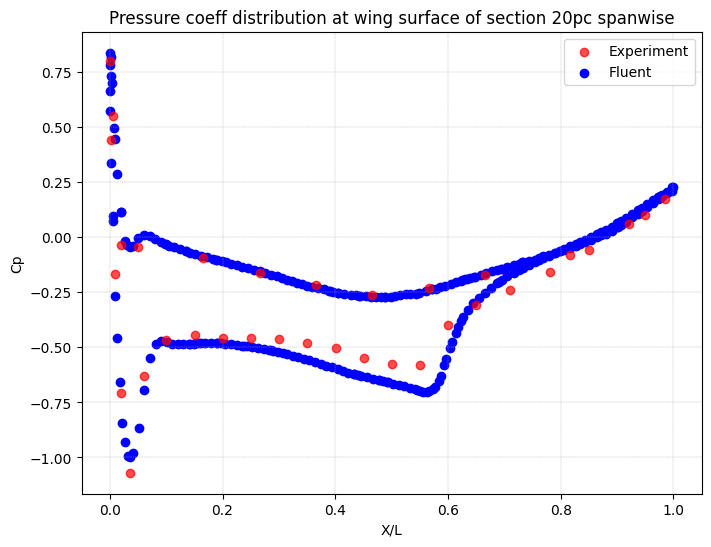

In [39]:
# Section
import pandas as pd
import numpy as np
file_path = 'postProcessing/boundaryCloud/1200/surface_p_res128.xy'
boundary_content = pd.read_csv(file_path, delimiter='\s+', skiprows=1, header=None, names=['x','y','z','p']).round(5)

rho = 1.184
v = 292.67
pv = 0.5 * rho * (v**2)
boundary_content['Cp'] = (boundary_content['p']-98858.97) / pv
def normalize(boundary_content):
    L = boundary_content['x'].max() - boundary_content['x'].min()
    lead = boundary_content['x'].min()
    boundary_content['X/L'] = (boundary_content['x'] - lead) / L
    return boundary_content

section = 0.2
y_coord = np.round(1.1963 * section,5)
exp_path = f"exp/exp{int(section * 100)}pc.csv"
exp_df = pd.read_csv(exp_path, delimiter='\s+', header=None, names=['Section','Tap','X/L','Z/L','Cp']).round(5)
fluent_path = f"20pc_fluent.csv"
fluent_df = pd.read_csv(fluent_path, delimiter=',', header=None, names=['x','Cp']).round(5)
fluent_df = normalize(fluent_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(exp_df['X/L'], exp_df['Cp'], color='red',alpha=0.7, label='Experiment', zorder=2)
plt.scatter(fluent_df['X/L'], fluent_df['Cp'], color='blue', label='Fluent')
# plt.scatter(of_upper['X/L'], of_upper['Cp'], color='blue', marker='^', label='OpenFOAM upper')
# plt.scatter(of_lower['X/L'], of_lower['Cp'], color='blue', marker='v', label='OpenFOAM lower')

plt.xlabel('X/L')
plt.ylabel('Cp')
plt.title(f'Pressure coeff distribution at wing surface of section {int(section * 100)}pc spanwise')
plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.legend()
plt.savefig(f"plots/section{int(section*100)}pc")

# Residual plot

In [15]:
import re
log_path = 'log/hisa.log'
with open(log_path,'r') as file:
    log_content = file.read()
GMRES_pattern = r"GMRES iteration: 0\s+Residual:\s+([0-9.]+)"
GMRES_matches = re.findall(GMRES_pattern, log_content)
omega_pattern = r"Solving for omega, Initial residual = ([0-9.eE+-]+)"
omega_matches = re.findall(omega_pattern, log_content)
k_pattern = r"smoothSolver:  Solving for k, Initial residual = ([0-9.eE+-]+)"
k_matches = re.findall(k_pattern, log_content)

if GMRES_matches:
    GMRES_residual = [float(value) for value in GMRES_matches]
else:
    print("No GMRES matches found")

if omega_matches:
    omega_residual = [float(value) for value in omega_matches]
else:
    print("No matches found for Omega Initial residual")

if k_matches:
    k_residual = [float(value) for value in k_matches]
else:
    print("No matches found for K Initial residual")

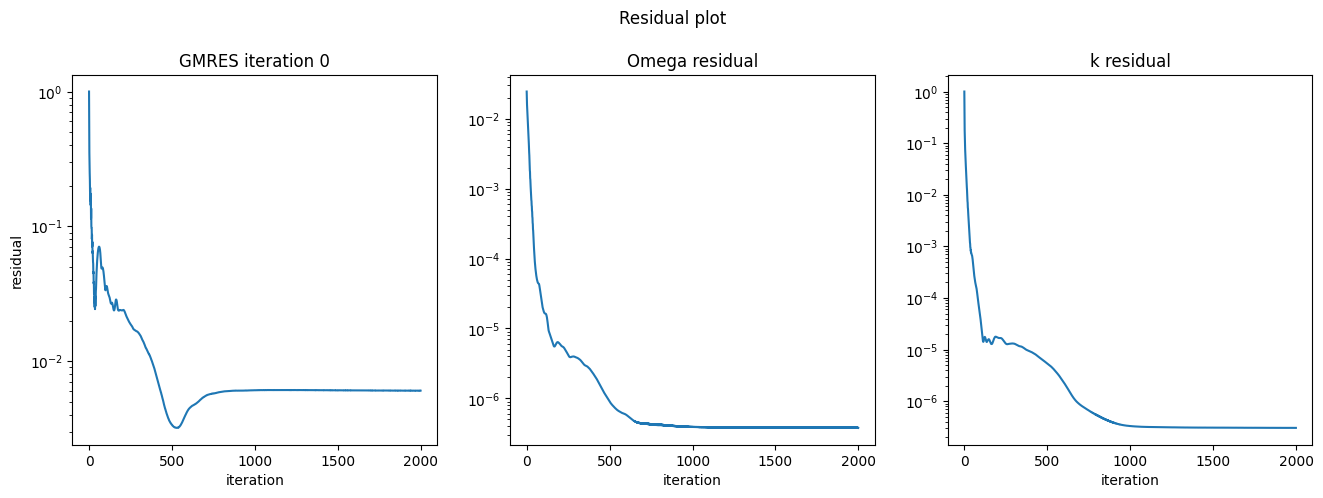

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(16,5))
axes[0].semilogy(GMRES_residual)
axes[0].set_title('GMRES iteration 0')
axes[0].set_ylabel('residual')
axes[0].set_xlabel('iteration')
axes[1].semilogy(omega_residual)
axes[1].set_title('Omega residual')
axes[1].set_xlabel('iteration')
axes[2].semilogy(k_residual)
axes[2].set_title('k residual')
axes[2].set_xlabel('iteration')

fig.suptitle('Residual plot')
plt.subplots_adjust(top=0.85)